In [1]:
%pylab inline
import seaborn
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


[2020-07-18 15:45:16,977] INFO in core: Started 


2020-06-11


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
IRA,21.0,0.311545,0.345324,-0.309108,-0.206884,0.291622,0.752792,0.993393,0.879016,7.266446,2.053161,0.041049
CSI 300,21.0,0.902763,1.276427,-1.104209,-0.779251,0.628976,3.230451,3.575955,0.700991,18.341077,5.576210,0.821133
M1,21.0,0.161305,0.241041,-0.224531,-0.200925,0.187072,0.465441,0.710788,0.636014,4.657121,1.684189,0.241647
S&P 500,21.0,0.209197,0.409694,-0.556800,-0.401523,0.318800,0.726982,1.107045,0.491092,7.493349,3.845538,-0.106077


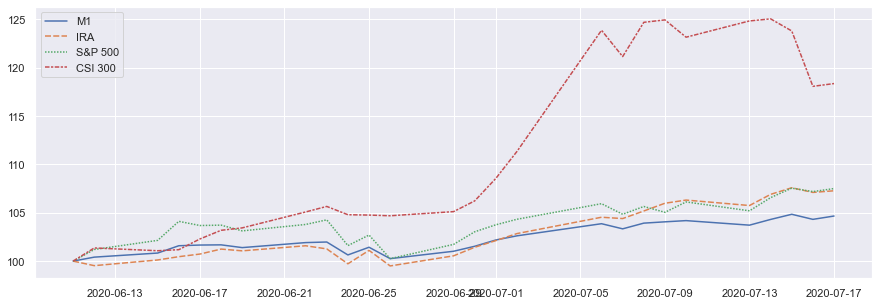

In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 21 + 5)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 21 + 5)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
seaborn.lineplot(data=frame)
_moving_average_statistics(frame, 5)

2020-06-19


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
CSI 300,15.0,1.032528,1.498992,-1.104209,-0.876738,0.629912,3.334102,3.575955,0.683477,14.414097,5.576210,0.466328
S&P 500,15.0,0.236174,0.420031,-0.556800,-0.448106,0.325984,0.752307,1.107045,0.543232,4.237943,3.845538,-0.197446
Robinhood,15.0,0.567238,1.565746,-1.727824,-1.691241,-0.053442,2.816470,3.012372,0.357170,10.402392,8.525888,0.044950


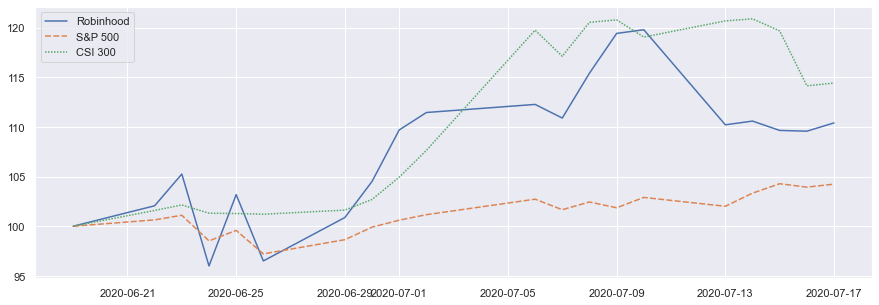

In [3]:
with app.app_context():
    rh = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Robinhood', 21 + 5)})
print(rh.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', rh.index[0])['Adj Close']
frame = DataFrame({
    'Robinhood': rh,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
seaborn.lineplot(data=frame)
_moving_average_statistics(frame, 5)

2020-01-10


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
CSI 300,126.0,0.093570,1.019650,-3.009172,-1.689324,0.206528,1.363550,3.575955,0.083921,9.349184,20.174870,0.019452
IRA,126.0,0.064796,1.856223,-7.145018,-3.787991,0.319237,1.803527,5.842439,0.030598,8.204613,46.663484,-1.437434
S&P 500,126.0,-0.006799,1.068524,-3.782369,-2.419149,0.193753,1.333826,3.152724,-0.013850,-0.206958,33.717265,-0.851967
M1,126.0,-0.034280,0.723562,-3.100050,-1.733870,0.136680,0.694110,1.420287,-0.058434,-3.863171,23.204681,-2.151719


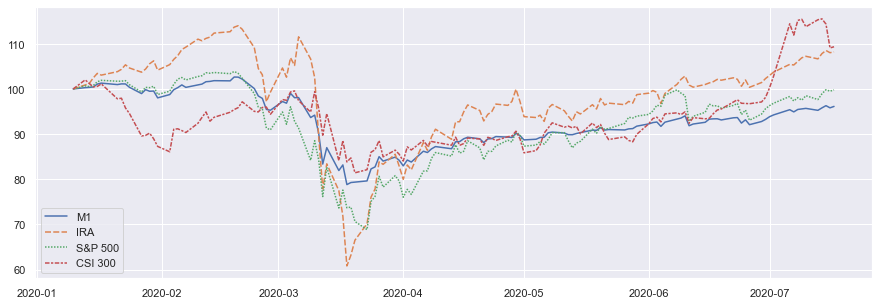

In [4]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 126 + 5)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 126 + 5)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
seaborn.lineplot(data=frame)
_moving_average_statistics(frame, 5)

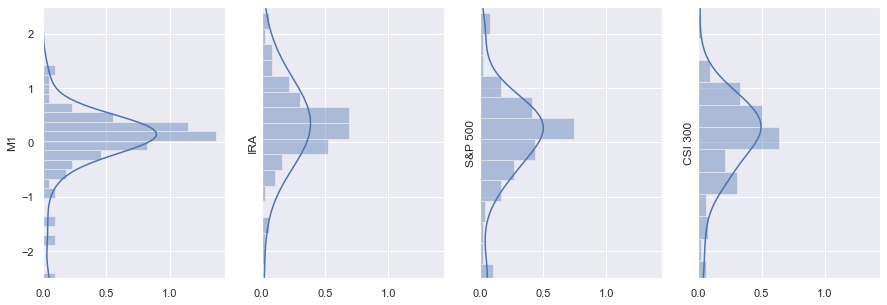

In [5]:
ret = frame.rolling(5).mean().pct_change() * 100
_, axes = plt.subplots(1, len(ret.columns), sharex=True, sharey=True)
for i, col in enumerate((ret.columns)):
    seaborn.distplot(ret[col], ax=axes[i], vertical=True)
_ = plt.setp(axes, ylim=[-2.5, +2.5])